# Analise dados de jogos de consoles

## **1. Importação de Base e de Bibliotecas**

In [ ]:
import pandas as pd
import os

In [ ]:
# Criar Dataframe
df = pd.read_csv("games.csv", sep=",", on_bad_lines='skip', lineterminator='\n')

## **2. Pequena Ánalise Exploratória de Dados (EDA)**

### **2.1 Informações do Dataset**

In [ ]:
#Imprimir informações do DataFrame
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating\r
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E\r
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,\r
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E\r
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E\r
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,\r


### **2.2 Histograma do Dataset**

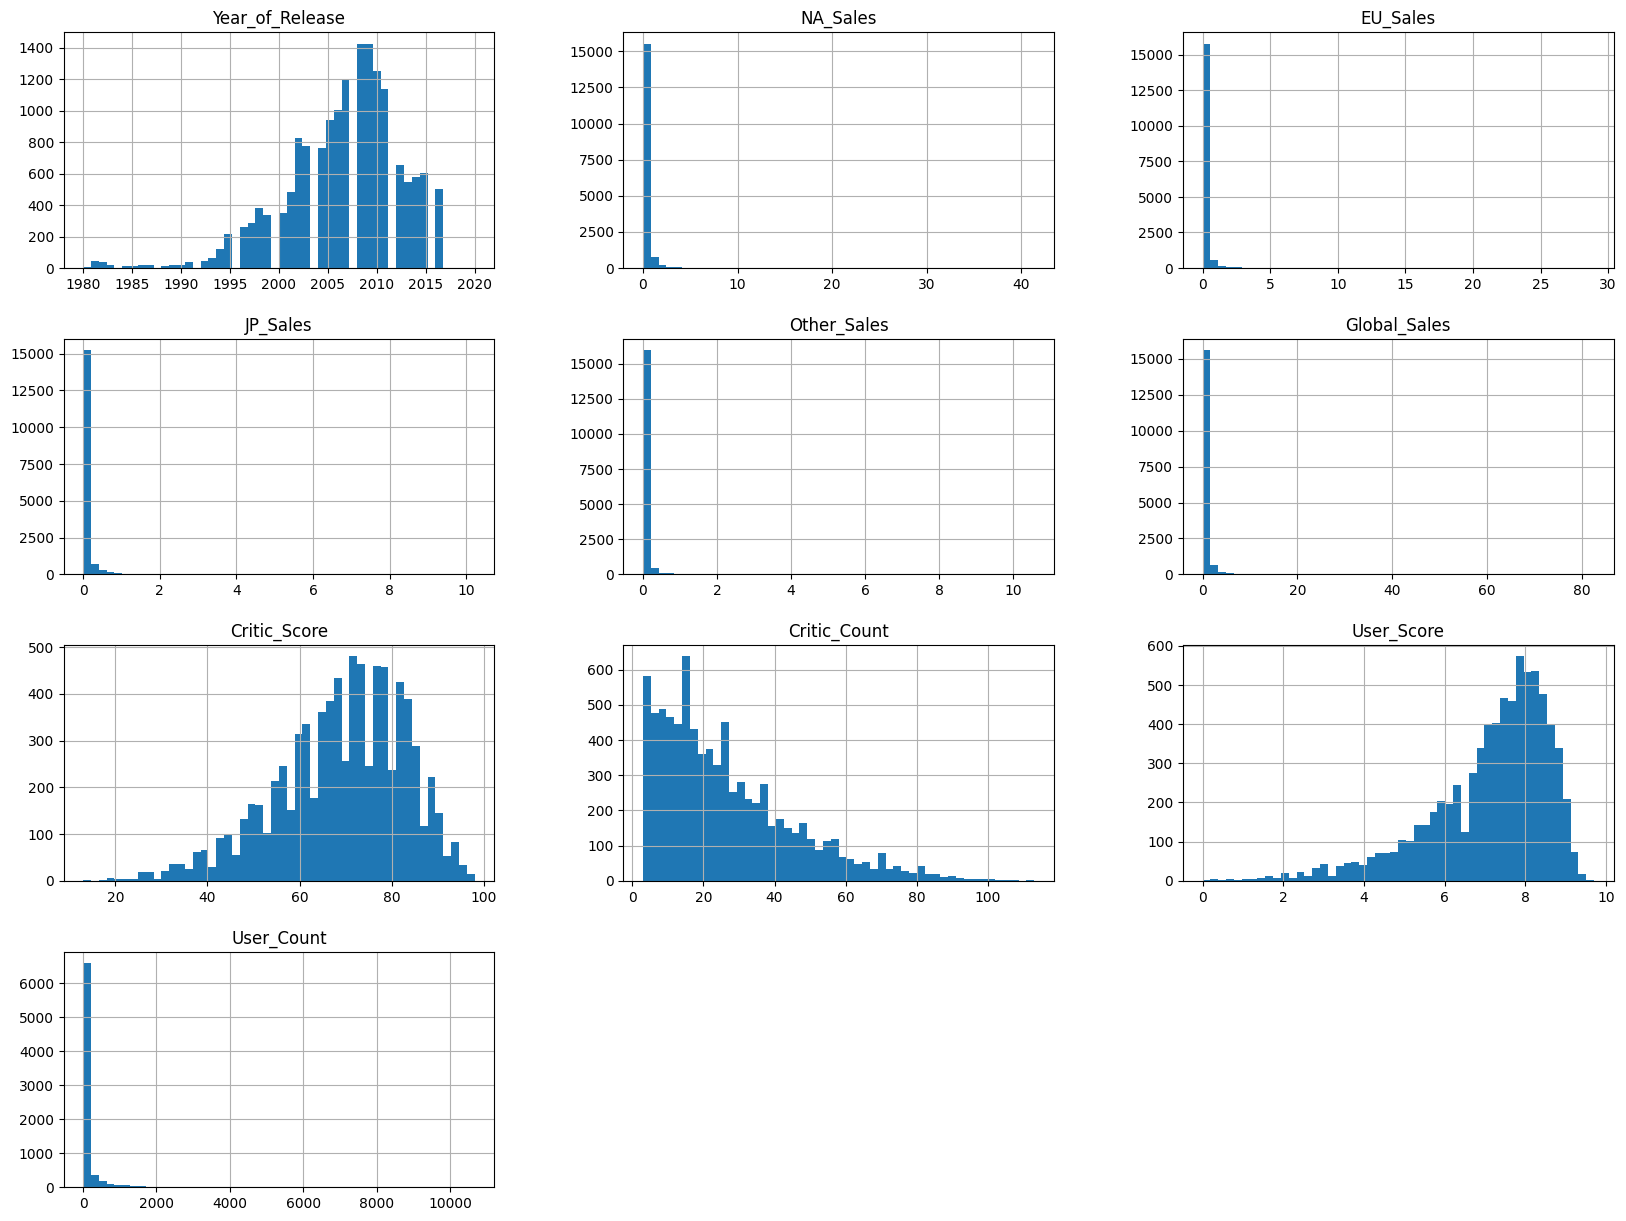

In [ ]:
# Importar Biblioteca Gráfica
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

### **2.3 verificando dados do Dataset**


#### ***2.3.1 Visualização de Valores Faltantes***

*   *Item da lista*
*   Item da lista

In [ ]:
# Verificar Dados Nulos no DataFrame
df.isnull().sum()

,0
Name,2
Platform,0
Year_of_Release,269
Genre,2
Publisher,54
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


<Axes: >

) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


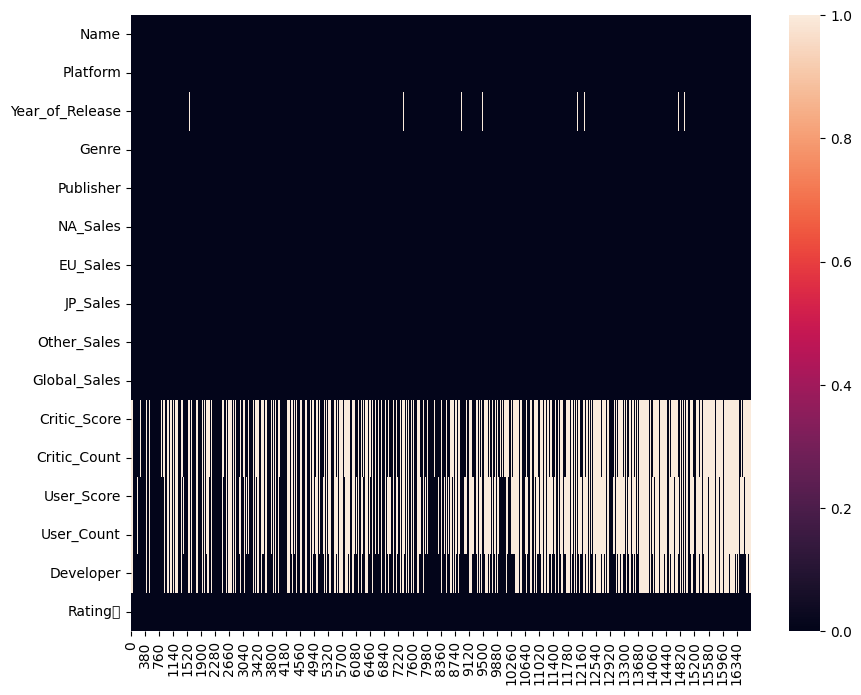

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.isna().transpose())

```
# Isto está formatado como código
```

#### 2.3.2 Impacto da coluna "user_count"

** **negrito**_Eliminando instância com dados faltantes é uma opção_**

In [ ]:
#Utilizar a Função dropna() do Pandas
df_sem_dados_faltantes = df.dropna()

#Verificar quantidade de dados nulos no DataSet
df_sem_dados_faltantes.sum().isnull()


,0
Name,False
Platform,False
Year_of_Release,False
Genre,False
Publisher,False
NA_Sales,False
EU_Sales,False
JP_Sales,False
Other_Sales,False
Global_Sales,False


**_Eliminando colunas com dados faltantes_**

> Adicionar aspas



In [ ]:
#Verificar quantidade de dados nulos no DataSet
df_sem_colunas = df.drop("User_Count",axis=1)
df_sem_colunas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  Developer        10096 non-null  object 
          16718 non-null  object 
dtypes: float64(9), object(6)
memory usage: 1.9+ MB


#### ***2.3.3 Tipos de dados Específicos no Pandas***

In [ ]:
#Explorando os dados do atributo "Platform"
platform = df.Platform.value_counts()
#O comando acima conta a frequência de cada categoria presente no atributo "Platform" do DataFrame df.
#Retorna uma série do Pandas, onde o Índice representa as categorias e os valores correspondentes.
print(platform)


Platform
PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64


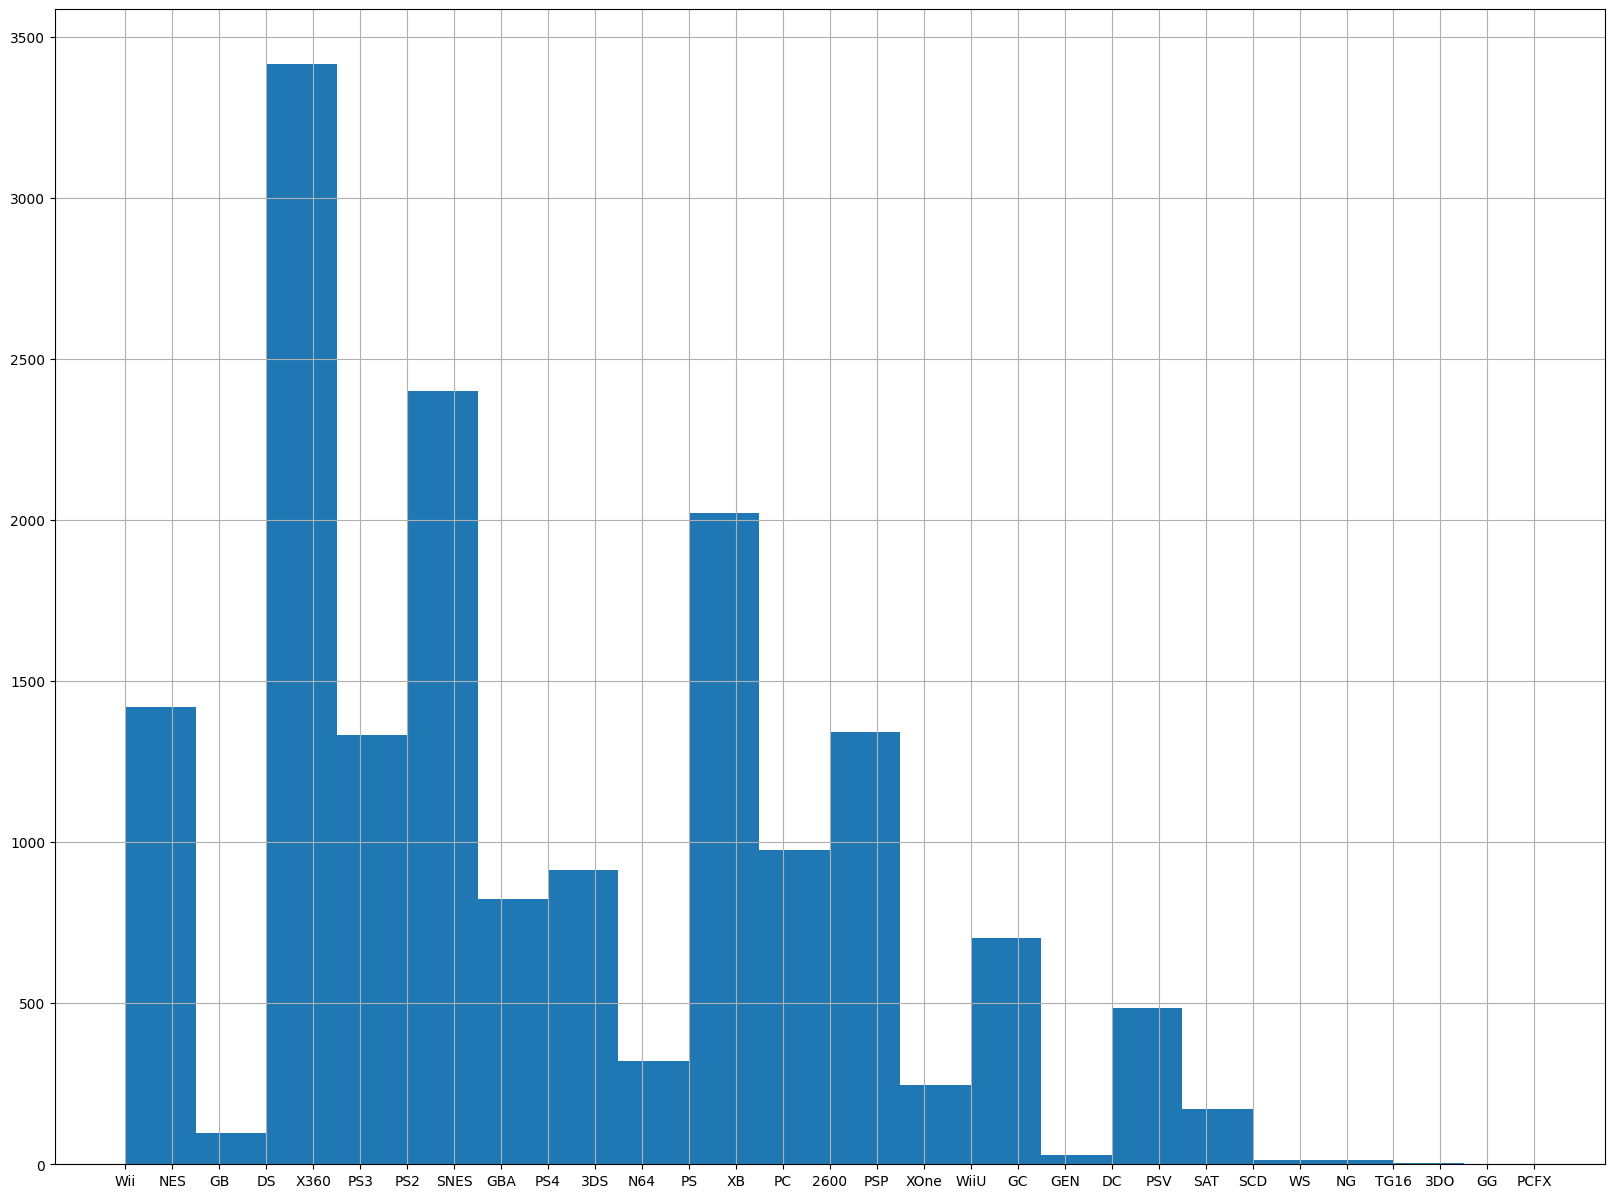

In [ ]:
df["Platform"].hist(bins=20, figsize=(20,15))
plt.show()

##### 2.3.4 Informações Estatisticas

In [ ]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


from matplotlib import pyplot as plt
_df_24['Year_of_Release'].plot(kind='hist', bins=20, title='Year_of_Release')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['NA_Sales'].plot(kind='hist', bins=20, title='NA_Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['EU_Sales'].plot(kind='hist', bins=20, title='EU_Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['JP_Sales'].plot(kind='hist', bins=20, title='JP_Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='Year_of_Release', y='NA_Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='NA_Sales', y='EU_Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30.plot(kind='scatter', x='EU_Sales', y='JP_Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31.plot(kind='scatter', x='JP_Sales', y='Other_Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32['Year_of_Release'].plot(kind='line', figsize=(8, 4), title='Year_of_Release')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_33['NA_Sales'].plot(kind='line', figsize=(8, 4), title='NA_Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_34['EU_Sales'].plot(kind='line', figsize=(8, 4), title='EU_Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_35['JP_Sales'].plot(kind='line', figsize=(8, 4), title='JP_Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

Verificando a quantidade de usuários.

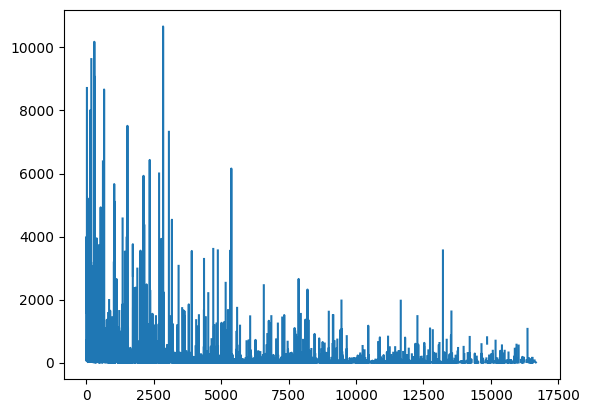

In [ ]:
df['User_Count'].plot()
plt.show()

## **3. Criar um Conjunto de Dados**

O Scilkit-Learn oferece algumas funções para dividir um conjunto de dados em vários subconjunto de dados em vários subconjuntos de dados de diversas maneiras.

### 3.1 Separando um conjunto de dados de Teste (de forma aleatória)

In [ ]:
# A função mais simples
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

**Para** visualizar esses dados. (Geron, 2017 p.53)

In [ ]:
len(train_set), len(test_set)

(13375, 3344)

**A** aleatoriedade na divisão dos dados é um principio importante. Porém, se há desbalanceamento nos dados essa aleatoridade pode agravar o problema.

### **3.2 Refazendo o conjunto de teste (de forma estratificada)**

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

# Criando a coluna de BR_Sales com faixas ajustadas
df['BR_Sales'] = pd.cut(df['Global_Sales'],
                           bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                           labels=[1, 2, 3, 4, 5])

# Certifica a contagem de amostra em cada classe
print (df['BR_Sales'].value_counts())

# Divisão estratificada
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['BR_Sales']):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]


BR_Sales
1    15465
2      783
3      231
5      147
4       93
Name: count, dtype: int64


Explorar a nova coluna "BR_Sales"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Name             16717 non-null  object  
 1   Platform         16719 non-null  object  
 2   Year_of_Release  16450 non-null  float64 
 3   Genre            16717 non-null  object  
 4   Publisher        16665 non-null  object  
 5   NA_Sales         16719 non-null  float64 
 6   EU_Sales         16719 non-null  float64 
 7   JP_Sales         16719 non-null  float64 
 8   Other_Sales      16719 non-null  float64 
 9   Global_Sales     16719 non-null  float64 
 10  Critic_Score     8137 non-null   float64 
 11  Critic_Count     8137 non-null   float64 
 12  User_Score       7590 non-null   float64 
 13  User_Count       7590 non-null   float64 
 14  Developer        10096 non-null  object  
          16718 non-null  object  
 16  BR_Sales         16719 non-null  category
dtypes: ca

In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating\r,BR_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E\r,5
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,\r,5
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E\r,5
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E\r,5
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,\r,5


### **4. Treinando o Modelo**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import numpy as np
#df.info()

In [ ]:
#df = pd.get_dummies(df, columns=['BR_Sales'])

X = df.drop('Global_Sales', axis=1)
y = df['Global_Sales']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_teste)

dic_modelos = {
    "ElasticNet": ElasticNet(),
    "RandomForestR": RandomForestRegressor(),
}

def fit_and_score(dic_modelos, X_train, X_test, y_train, y_test):
  model_scores = {}
  for name, model in dic_modelos.items():
      model.fit(X_train, y_test)
      y_pred = model.predict(X_test)
      model_scores[name] = mean_squared_error(y_test, y_pred)
  return model_scores

resultado = fit_and_score(dic_modelos, X_train, X_test, y_train, y_test)
print(resultado)

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'Gallop & Ride!'